# Convert to csv

In [60]:
import pandas as pd
import csv
import os
import json
'''
LABEL 0 : NON - MASKED PERSON
LABEL 1: MASKED PERSON

'''
person_no_mask_labels = {'eyeglasses','face_no_mask','face_other_covering','hat','sunglasses','turban'}
not_person = 'not_person'

with open('Labels.csv','w',newline='') as file:
    wr = csv.writer(file,delimiter=',')    
    wr.writerow(['ImageNo','Label','Tags'])
    

path_to_dataset = 'D:\pravesh\\Concordia\\2021-Winter\\COMP-6721-Intro_To_AI\\project\\1\dataset\\'
image_file_names= [i for i in os.listdir(path_to_dataset+'images')]

rows = []
for index, image_name  in enumerate(image_file_names):
    path_to_json = path_to_dataset + 'annotations\\' + image_name + '.json'
    data = json.load(open(path_to_json))
    image_tags = set()
    label = 0
    for item in data['Annotations']:
        image_tags.add(item['classname'])
    rows.append((image_name, image_tags))

print(len(rows))

with open('Labels.csv','a',newline='') as file:
    for image_name, image_tags in rows:
        label = 0
        if not_person in image_tags:
            label = 2
        elif len(image_tags & person_no_mask_labels)>0:
            label = 1
        else:
            label = 0
        wr = csv.writer(file,delimiter=',') 
        wr.writerow([image_name, label, ','.join(image_tags)])

2642


In [ ]:
# List down categories

In [32]:
import csv

tags = set()

with open('Labels.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for (name, label, image_tags) in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
#             print(f'{name}, {label}, {image_tags}')
            tags = tags | set(image_tags.split(','))
            line_count += 1
    print(f'Processed {line_count} lines.')
print(tags)

Column names are 6435.jpg, 1, {'face_with_mask_incorrect', 'mask_surgical'}
Processed 1700 lines.
{'mask_surgical', 'face_with_mask_incorrect', 'goggles', 'hair_net', 'balaclava_ski_mask', 'eyeglasses', 'sunglasses', 'other', 'hijab_niqab', 'face_other_covering', 'hood', 'helmet', 'mask_colorful', 'face_shield', 'hat', 'turban', 'face_with_mask', 'face_no_mask', 'scarf_bandana', 'gas_mask'}


In [ ]:
# Segregate with categories

In [57]:
import csv

tags = {'mask_surgical', 'face_with_mask_incorrect', 'goggles', 'hair_net'
        , 'balaclava_ski_mask', 'eyeglasses', 'sunglasses', 'other'
        , 'hijab_niqab', 'face_other_covering', 'hood', 'helmet'
        , 'mask_colorful', 'face_shield', 'hat', 'turban', 'face_with_mask'
        , 'face_no_mask', 'scarf_bandana', 'gas_mask'}

rows = []

path_to_dataset = 'D:\pravesh\\Concordia\\2021-Winter\\COMP-6721-Intro_To_AI\\project\\1\dataset\\'

with open('Labels.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
#             print(f'{name}, {label}, {image_tags}')
            rows.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

print(len(rows))

for tag in tags:
    path_to_tag_directory = path_to_dataset + 'images\\' + tag
    if not os.path.isdir(path_to_tag_directory):
        os.mkdir(path_to_tag_directory)
    for (name, _, image_tags) in rows:
        path_to_file = path_to_dataset + 'images\\' + name
#         print(path_to_file)
#         print(os.path.isfile(path_to_file))
        if os.path.isfile(path_to_file):
            if tag in image_tags:
                new_file_path = path_to_tag_directory+'\\'+ name
#                 print(path_to_file, new_file_path)
                os.rename(path_to_file, new_file_path)
#         break
#     break

Column names are ImageNo, Label, Tags
Processed 3649 lines.
3648


In [66]:
import pandas as pd
import csv
import os
import json
'''
LABEL 0 : NON - MASKED PERSON
LABEL 1: MASKED PERSON

'''
person_no_mask_labels = {'eyeglasses','face_no_mask','face_other_covering','hat','sunglasses','turban'}
label_map = {'mask': 0,
            'no_mask': 1,
            'not_person': 2}
    

path_to_dataset = 'D:/pravesh/Concordia/2021-Winter/COMP-6721-Intro_To_AI/project/1/dataset/'

images_dir = path_to_dataset+'images/'

dir_names= [i for i in os.listdir(images_dir)]

rows = {0: [], 1:[], 2:[]}
for index, dir_name in enumerate(dir_names):
    count=0
    label = label_map[dir_name]
    dir_path = images_dir + dir_name + '/'
    image_names= [i for i in os.listdir(dir_path)]
    for index, image_name  in enumerate(image_names):
        path_to_json = path_to_dataset + 'annotations/' + image_name + '.json'
        data = json.load(open(path_to_json))
        image_tags = set()
        for item in data['Annotations']:
            image_tags.add(item['classname'])
        rows[label].append((dir_name+'/'+image_name, label, image_tags))
        count+=1
    print(dir_name, count, len(rows))
        
print(len(rows))

test_label_file = path_to_dataset+'test_label_info.csv'

with open(test_label_file,'w',newline='') as file:
    wr = csv.writer(file,delimiter=',')    
    wr.writerow(['ImageNo','Label','Tags'])

with open(test_label_file,'a',newline='') as file:
    wr = csv.writer(file,delimiter=',')
    for i in range(3):
        label_rows = rows[i]
        for j in range(100):
            image, label, image_tags = label_rows[j]
            wr.writerow([image, label])
            
train_label_file = path_to_dataset+'train_label_info.csv'

with open(train_label_file,'w',newline='') as file:
    wr = csv.writer(file,delimiter=',')    
    wr.writerow(['ImageNo','Label','Tags'])      
            
with open(train_label_file,'a',newline='') as file:
    wr = csv.writer(file,delimiter=',')
    for i in range(3):
        label_rows = rows[i]
        for j in range(100, 100+350, 1):
            image, label, image_tags = label_rows[j]
            wr.writerow([image, label])

mask 1749 3
not_person 450 3
no_mask 892 3
3


In [51]:
class ProjectDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None, debug=False):
        self.label_info_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.debug = debug

    def __len__(self):
        return len(self.label_info_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        label_img_name = self.label_info_frame.iloc[idx, 0]
        img_name = os.path.join(self.root_dir,
                                label_img_name)
        image = io.imread(img_name)
        label = self.label_info_frame.iloc[idx, 1]
        label = np.array([label])
        landmarks = label.astype('float').reshape(-1, 1)
        sample = {'image': image
                  ,'label': label
                  ,'name': label_img_name}

        if self.transform:
            sample = self.transform(sample)
            
        if self.debug:
            print(label_img_name)

        return sample

class Rescale(object):
    def __init__(self, output_size):
        assert isinstance(output_size, (int))
        self.output_size = output_size
        self.debug = False

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size, self.output_size * w / h

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))
        
        # Clipping or filling
        if new_w>self.output_size:
            mid = new_w//2
            new_w_start = mid-self.output_size//2
            new_w_end = mid+self.output_size//2
            
            if (new_w_end-new_w_start)<self.output_size:
                new_w_end += (self.output_size-(new_w_end-new_w_start))
            elif (new_w_end-new_w_start)>self.output_size:
                new_w_end -= ((new_w_end-new_w_start)-self.output_size)
            img = img[:, new_w_start:new_w_end]
        elif new_w<self.output_size:
            mid = new_w//2
            new_w_start = self.output_size//2-mid
            new_w_end = new_w_start+new_w
            filled_img = np.zeros((self.output_size, self.output_size, img.shape[2]))
            filled_img[:, new_w_start:new_w_end] = img[:, :]
            img = filled_img
        if self.debug:
            root_dir = dataset.root_dir 
            copy_dir = root_dir+'rescaled/'
            img_name = sample['name']
            if not os.path.isdir(copy_dir):
                os.mkdir(copy_dir)
            label_dir_name = img_name.split('\\')[0]
            label_dir_path = copy_dir + label_dir_name + '/'
            if not os.path.isdir(label_dir_path):
                os.mkdir(label_dir_path)
            path_to_rescaled_img = copy_dir + img_name
            io.imsave(path_to_rescaled_img, img, check_contrast=False)
        
        return {'image': img, 'label': label}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'label': torch.from_numpy(label)}
    
    
class ConvertToType(object):
    def __init__(self, conversion_type, debug=False):
        self.conversion_type = conversion_type
        self.debug = debug

    def __call__(self, img):
        return img.type(self.conversion_type)

NameError: name 'Dataset' is not defined

In [ ]:
dataset = ProjectDataset(
    csv_file='D:/pravesh/Concordia/2021-Winter/COMP-6721-Intro_To_AI/project/comp-6721-project/label_info.csv'
    ,root_dir='D:/pravesh/Concordia/2021-Winter/COMP-6721-Intro_To_AI/project/1/dataset/images/')
print(len(dataset))

output_height = 512

scale = Rescale(output_height)

In [ ]:
import gc
gc.collect()

counts = np.zeros((100, ))
label_counts = {0: np.zeros((100, ))
                , 1: np.zeros((100, ))
                , 2:np.zeros((100, ))}

dataset.debug=False
scale.debug=True
t1 = time.time()
max_w, max_h = 0, 0
min_w, min_h = 1000000, 100000
count = 0
for k in range(5):
    sample = dataset[k]
    sample_image = sample['image']
    label = sample['label'][0]
    print(sample['name'], sample_image.shape)
    
    h, w, _ = sample_image.shape
    if w>max_w:
        max_w = w
    if h>max_h:
        max_h = h
    if w<min_w:
        min_w = w
    if h<min_h:
        min_h = h
    index = w//100
    counts[index]+=1
    label_counts[label][index]+=1
    
    transformed_sample = scale(sample)
    image = transformed_sample['image']
    print(sample['name'], image.shape)
    plt.figure()
#     image = image.astype(np.uint8)
    plt.imshow(image)
    plt.show()
    count+=1
    if count%100==0:
        gc.collect()
        print(count)
        print((time.time()-t1))
    
print((time.time()-t1))
print(max_w, max_h, min_w, min_h)
print(counts)
for key in label_counts:
    print(key, label_counts[key])

In [ ]:
transformed_dataset = ProjectDataset(csv_file='D:/pravesh/Concordia/2021-Winter/COMP-6721-Intro_To_AI/project/comp-6721-project/label_info.csv'
                                     ,root_dir='D:/pravesh/Concordia/2021-Winter/COMP-6721-Intro_To_AI/project/1/dataset/images/'
                                     ,transform=transforms.Compose([
                                         Rescale(512)
                                         ,ToTensor()
                                     ]))
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)

In [ ]:
dataset_size = len(dataset)
X = np.zeros((dataset_size, output_height, output_height, 3), dtype=np.float32)
y = np.zeros((dataset_size, 1), dtype=np.int32)
for k in range(dataset_size):
    sample = dataset[k]
    sample_image, label = sample['image'], sample['label'][0]
    
    transformed_sample = scale(sample)
    image = transformed_sample['image']
    X[k] = image
    y[k] = label
np.savez_compressed('X.npz', X)
np.savez_compressed('y.npz', y)
print('Done converting to Numpy arrays')

In [7]:
x = 29.644351959228516+(13*60)
int(x//60)

13

In [ ]:
from torch.nn import Module, Conv2d, MaxPool2d, Linear, ReLU

class ProjectModel(Module):
    def __init__(self):
        super(ProjectModel, self).__init__()
        self.conv1 = Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=2)
        self.pool1 = MaxPool2d(2)
        self.conv2 = Conv2d(in_channels=16, out_channels = 32, kernel_size=3)
        self.linear = Linear(in_features = 32*125*125, out_features=3)
        
    def forward(self, X):
        relu = ReLU(inplace=True)
        X = self.conv1(X)
        X = relu(X)
        X = self.pool1(X)
        X = self.conv2(X)
        X = relu(X)
        X = torch.flatten(X, 1)
        X = self.linear(X)
        return X

net = ProjectModel()

In [5]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_, normalize='all')*100
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)

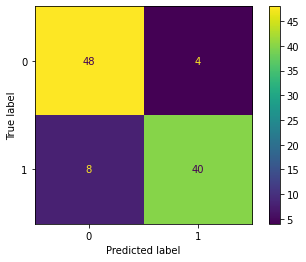

In [8]:
disp.plot(cmap='') 

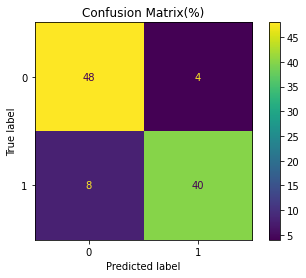

In [11]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Confusion Matrix(%)')
disp.plot(ax=ax)